# 1. Load and Preprocess Image Data

In [44]:
# basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns
import cv2

# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

import os
from pathlib import Path
from tqdm import tqdm

In [2]:
directory = str(Path.cwd())

all_img_dir = [i for i in os.listdir(directory+'/Images') if 'n0' in i]
Name = []
for file in all_img_dir: 
    name = file.split('-')[-1]
    Name += [name]
print(Name)
print(len(Name))

['redbone', 'Samoyed', 'affenpinscher', 'West_Highland_white_terrier', 'whippet', 'Cardigan', 'Greater_Swiss_Mountain_dog', 'malamute', 'coated_retriever', 'Leonberg', 'Japanese_spaniel', 'briard', 'English_springer', 'Brittany_spaniel', 'schipperke', 'papillon', 'Old_English_sheepdog', 'clumber', 'collie', 'miniature_pinscher', 'Italian_greyhound', 'Border_collie', 'Irish_setter', 'Labrador_retriever', 'Boston_bull', 'Walker_hound', 'Saint_Bernard', 'Lakeland_terrier', 'Welsh_springer_spaniel', 'Saluki', 'African_hunting_dog', 'English_foxhound', 'haired_fox_terrier', 'Afghan_hound', 'silky_terrier', 'Irish_terrier', 'groenendael', 'Newfoundland', 'coated_wheaten_terrier', 'dingo', 'keeshond', 'American_Staffordshire_terrier', 'beagle', 'Weimaraner', 'vizsla', 'Eskimo_dog', 'Tibetan_terrier', 'golden_retriever', 'Dandie_Dinmont', 'kuvasz', 'Irish_water_spaniel', 'haired_pointer', 'Sealyham_terrier', 'Bouvier_des_Flandres', 'Airedale', 'tan_coonhound', 'Irish_wolfhound', 'standard_pood

In [93]:
names = ['Japanese_spaniel', 
 'Afghan_hound', 
 'Pekinese', 
 'Tzu', 
 'Rhodesian_ridgeback',
 'Chihuahua',
 'toy_terrier',
 'Maltese_dog',
 'papillon', 
 'Blenheim_spaniel']

sub_img_dir = []
for name in names:
    img = [i for i in all_img_dir if name in i]
    sub_img_dir += img
sub_img_dir

['n02085782-Japanese_spaniel',
 'n02088094-Afghan_hound',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02087394-Rhodesian_ridgeback',
 'n02085620-Chihuahua',
 'n02087046-toy_terrier',
 'n02085936-Maltese_dog',
 'n02086910-papillon',
 'n02086646-Blenheim_spaniel']

In [3]:
def search_boundary(bd_path):
    with open(bd_path, 'r') as f:
        content = f.read()
        bds = []
        
        axes = ['xmin', 'xmax', 'ymin', 'ymax']
        for ax in axes:
            start = content.find('<'+ax+'>') +6
            end = content.find('</'+ax+'>')    
            
            bd = int(content[start:end])
            bds.append(bd) 

        
    return bds[0], bds[1], bds[2], bds[3]

In [4]:
def target_locator(img, xmin, xmax, ymin, ymax):
    if len(img.shape) == 3:
        image = img[ymin:ymax, xmin:xmax, :]
    else:
        image = img[ymin:ymax, xmin:xmax]
        
    return image

### Here is an example image:

(375, 500, 3)


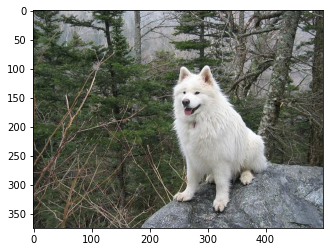

In [5]:
smy_img_dir = os.path.join(directory+'/Images', 'n02111889-Samoyed')
im_code = 'n02111889_8870.jpg'
smy_img = os.path.join(smy_img_dir+'/', im_code)
im1 = np.flip(cv2.imread(smy_img), axis=-1)

print(im1.shape)
plt.imshow(im1)

***Now, apply predefined functions to chop out the part wihtin the bounding box***

(256, 171, 3)


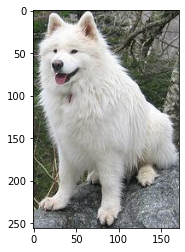

In [6]:
smy_bd_dir = os.path.join(directory+'/Annotation', 'n02111889-Samoyed')
smy_bd_path = os.path.join(smy_bd_dir+'/',im_code[:-4])
xmin, xmax, ymin, ymax=search_boundary(smy_bd_path)
image1 = target_locator(im1, xmin, xmax, ymin, ymax)
print(image1.shape)
plt.imshow(image1)

In [94]:
# def load_image(N=len(Name), dsize=(128, 128)):
def load_image(N=len(names), dsize=(128, 128)):
    train_data = [] #np.array([])
    test_data = [] #np.array([])
    train_label = [] #np.array([]) 
    test_label = [] #np.array([])

    for i in tqdm(range(N)): #len(Name)
        
        img_dir = os.path.join(directory+'/Images', sub_img_dir[i]) #all_img_dir[i])
        bd_dir = os.path.join(directory+'/Annotation', sub_img_dir[i]) #all_img_dir[i])
        
        n = len(os.listdir(img_dir))
        t = 0
        
        for im in os.listdir(img_dir):
            
            img_path = os.path.join(img_dir+'/', im)
            bd_path = os.path.join(bd_dir+'/', im[:-4])
            
            # Default is to read img in RGB scale
            img = np.flip(cv2.imread(img_path), #if grayscale: cv2.IMREAD_GRAYSCALE
                            axis=-1) 
            
            xmin, xmax, ymin, ymax = search_boundary(bd_path)
            image = target_locator(img, xmin, xmax, ymin, ymax)
    
            # skip faulty images
            if not np.any(image):
                t+=1
                continue
            
            image = cv2.resize(image, dsize=dsize)            
            image = image/255.0
            
            if t <= np.floor(n*0.8):
                train_data.append(image)
                train_label.append(Name[i])          
            else:
                test_data.append(image)
                test_label.append(Name[i])
        
            t+=1
    
    return train_data, test_data, train_label, test_label


### Read image data


In [95]:
# train_data, test_data, train_label, test_label = load_image(color_mode='grayscale',
#                                                             target_size=(128,128))
n_class = 10

train_data, test_data, train_label, test_label = load_image(N=n_class, dsize=(128,128))

100%|██████████| 10/10 [00:17<00:00,  1.74s/it]


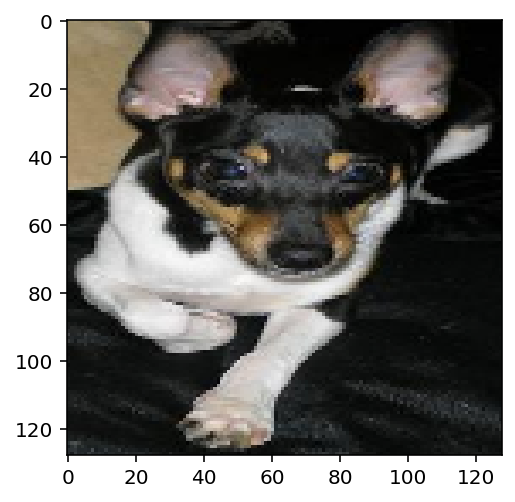

In [96]:
plt.imshow(train_data[1002])

In [97]:
# convert data and labels to np array 
x_train = np.array(train_data)
x_test = np.array(test_data)

train_label = np.array(train_label)
test_label = np.array(test_label)


# flatten data to feed into SVM classifier
X_train = x_train.reshape((x_train.shape[0], 
                           x_train.shape[1]**2 * x_train.shape[-1]))
X_test = x_test.reshape((x_test.shape[0],
                            x_test.shape[1]**2 * x_test.shape[-1]))

# Let's print out the new data shapes
print('train shape is now: ' + str(X_train.shape))
print('test  shape is now: ' + str(X_test.shape))

train shape is now: (1541, 49152)
test  shape is now: (378, 49152)


In [98]:
train_label.shape, test_label.shape

((1541,), (378,))

In [99]:
train_df = pd.DataFrame(X_train)
train_df['label'] = train_label

test_df = pd.DataFrame(X_test)
test_df['label'] = test_label

In [100]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,0.494118,0.494118,0.537255,0.521569,0.498039,0.435294,0.529412,0.478431,0.411765,0.474510,...,0.070588,0.062745,0.211765,0.062745,0.058824,0.203922,0.066667,0.066667,0.227451,redbone
1,0.721569,0.658824,0.592157,0.717647,0.654902,0.588235,0.717647,0.654902,0.588235,0.725490,...,0.454902,0.349020,0.282353,0.478431,0.376471,0.309804,0.345098,0.254902,0.184314,redbone
2,0.650980,0.662745,0.737255,0.650980,0.662745,0.737255,0.647059,0.662745,0.737255,0.643137,...,0.541176,0.564706,0.627451,0.564706,0.588235,0.647059,0.560784,0.584314,0.639216,redbone
3,0.407843,0.368627,0.368627,0.431373,0.384314,0.384314,0.450980,0.407843,0.400000,0.458824,...,0.690196,0.611765,0.615686,0.698039,0.619608,0.623529,0.682353,0.603922,0.607843,redbone
4,0.101961,0.250980,0.098039,0.074510,0.219608,0.070588,0.117647,0.250980,0.105882,0.160784,...,0.223529,0.392157,0.215686,0.305882,0.478431,0.305882,0.439216,0.607843,0.439216,redbone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0.494118,0.482353,0.400000,0.490196,0.482353,0.388235,0.419608,0.415686,0.345098,0.325490,...,0.419608,0.380392,0.345098,0.396078,0.360784,0.325490,0.454902,0.419608,0.384314,Leonberg
1537,0.392157,0.309804,0.141176,0.403922,0.321569,0.145098,0.411765,0.329412,0.152941,0.411765,...,0.454902,0.400000,0.443137,0.607843,0.568627,0.529412,0.776471,0.741176,0.682353,Leonberg
1538,0.572549,0.580392,0.623529,0.568627,0.576471,0.623529,0.568627,0.576471,0.623529,0.572549,...,0.356863,0.274510,0.227451,0.305882,0.227451,0.188235,0.482353,0.411765,0.388235,Leonberg
1539,0.286275,0.235294,0.333333,0.305882,0.290196,0.403922,0.388235,0.396078,0.517647,0.545098,...,0.431373,0.443137,0.521569,0.329412,0.325490,0.407843,0.211765,0.176471,0.250980,Leonberg


In [14]:
# train_df.to_csv("data/train_data.csv")
# test_df.to_csv("data/test_data.csv")

# 2. Algorithm implementation

# Baseline: kernel SVM

In [15]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN

# evaluation
from sklearn.model_selection import (train_test_split, KFold, GridSearchCV)
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, auc, roc_curve)

In [16]:
# train_df = pd.read_csv('data/train_data.csv', index_col=[0])
# test_df = pd.read_csv('data/test_data.csv', index_col=[0])

In [ ]:
# train_df

In [17]:
X_train = train_df.iloc[:,:-1].values
y_train = train_df['label'].values

X_test = test_df.iloc[:,:-1].values
y_test = test_df['label'].values

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1395, 49152), (1395,), (340, 49152), (340,))

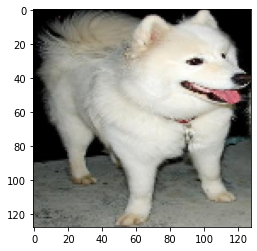

In [19]:
img = X_train[231].reshape((128,128,3))
plt.imshow(img)

## Use training set to find the best hyperparameter

In [ ]:
model = SVC()
param_grid = {#'kernel':('linear', 'rbf'),
             'C': [0.1, 1, 10]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf = GridSearchCV(estimator=model, 
                   param_grid=param_grid, 
                   cv=kf,
                   verbose=3, n_jobs=-1)
clf.fit(X_train, y_train)

# View the Grid Search CV Results
pd.DataFrame(clf.cv_results_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 5/5] END .............................C=0.1;, score=0.262 total time= 1.9min
[CV 2/5] END ...............................C=1;, score=0.416 total time= 1.5min
[CV 4/5] END ...............................C=1;, score=0.513 total time= 1.2min
[CV 1/5] END ...............................C=1;, score=0.427 total time= 1.5min
[CV 1/5] END ..............................C=10;, score=0.455 total time= 1.3min
[CV 3/5] END ...............................C=1;, score=0.419 total time= 1.5min
[CV 5/5] END ...............................C=1;, score=0.430 total time= 1.5min
[CV 2/5] END .............................C=0.1;, score=0.251 total time= 1.7min
[CV 3/5] END ..............................C=10;, score=0.477 total time= 1.3min
[CV 3/5] END .............................C=0.1;, score=0.262 total time= 1.5min
[CV 2/5] END ..............................C=10;, score=0.416 total time= 1.7min
[CV 4/5] END .............................C=0.1;,

### Test

In [ ]:
svm = SVC(kernel='rbf', C=10).fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)

print("Classifier: SVM; Test accuracy: %f" % svm_acc)
print(confusion_matrix(y_test, y_pred))

## CNN

In [16]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import time

In [17]:
batch_size = 15
num_epoch = 40

In [101]:
x_train.shape, x_test.shape

((1541, 128, 128, 3), (378, 128, 128, 3))

In [102]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
 
# y_train_int = LabelEncoder().fit_transform(y_train)
# y_train_int = y_train_int.reshape(len(y_train_int), 1)
# train_label = OneHotEncoder(sparse=False).fit_transform(y_train_int)

# y_test_int = LabelEncoder().fit_transform(y_test)
# y_test_int = y_test_int.reshape(len(y_test_int), 1)
# test_label = OneHotEncoder(sparse=False).fit_transform(y_test_int)

train_label = np.array([Name.index(label) for label in train_label])
test_label = np.array([Name.index(label) for label in test_label])

print(train_label.shape)
print(train_label)
print(test_label.shape)

(1541,)
[0 0 0 ... 9 9 9]
(378,)


In [103]:
train_ratio = 0.9
train_data, valid_data, train_label, valid_label = train_test_split(x_train, train_label, 
                                                                  train_size=train_ratio,
                                                                  shuffle=True,
                                                                  random_state=42)
train_data.shape, valid_data.shape

((1386, 128, 128, 3), (155, 128, 128, 3))

In [104]:
# calc mean and std for tensor normalization
train_mean = tuple(np.mean(train_data, axis=(0,1,2))) 
train_std = tuple(np.std(train_data, axis=(0,1,2)))

val_mean = tuple(np.mean(test_data, axis=(0,1,2)))
val_std = tuple(np.std(test_data, axis=(0,1,2)))

test_mean = tuple(np.mean(test_data, axis=(0,1,2)))
test_std = tuple(np.std(test_data, axis=(0,1,2)))

train_mean, val_mean

((0.5103635610890181, 0.467066705555409, 0.41374093784030375),
 (0.5175823333144232, 0.4783053737967461, 0.4265285466205684))

In [105]:
# training set transformation with data augmentation
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(), # image to Tensor and normalize to [0,1]
    transforms.Normalize(mean=train_mean, std=train_std)
#     transforms.ToTensor()
])

# testing set without data augmentation
val_transform = transforms.Compose([   
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=val_mean, std=val_std)
#     transforms.ToTensor()
])

test_transform = transforms.Compose([  
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=test_mean, std=test_std)
#     transforms.ToTensor()
])

class ImgDataset(Dataset):
    def __init__(self, x, y=None, transform=None):
        self.x = x
        # label is required to be a LongTensor
        self.y = y
        if y is not None:
            self.y = torch.LongTensor(y)
        self.transform = transform
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        X = self.x[index]
        if self.transform is not None:
            X = self.transform(X)
        if self.y is not None:
            Y = self.y[index]
            return X, Y
        else:
            return X

In [106]:
# train_data = train_data.astype('float32')
# train_label = train_label.astype('float32')
# test_data = x_test.astype('float32')
# test_label = test_label.astype('float32')
# train_data.dtype

In [107]:
train_set = ImgDataset(train_data, train_label, transform=train_transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

valid_set = ImgDataset(valid_data, valid_label, transform=val_transform)
valid_loader = DataLoader(valid_set, batch_size=batch_size , shuffle=True)

In [108]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # torch.nn.MaxPool2d(kernel_size, stride, padding)
        # input dim [3, 128, 128]
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),  # [64, 128, 128]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [64, 64, 64]

            nn.Conv2d(64, 128, 3, 1, 1), # [128, 64, 64]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [128, 32, 32]

            nn.Conv2d(128, 256, 3, 1, 1), # [256, 32, 32]
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [256, 16, 16]

            nn.Conv2d(256, 512, 3, 1, 1), # [512, 16, 16]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),       # [512, 8, 8]
            
            nn.Conv2d(512, 512, 3, 1, 1), # [512, 8, 8]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),       # [512, 4, 4]
        )
        self.fc = nn.Sequential(
#             nn.Linear(512*8*8, 1024),
            nn.Linear(512*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = x.float()
        out = self.cnn(x)
        out = out.view(out.size()[0], -1)
        return self.fc(out)

In [109]:
Net().load_state_dict

<bound method Module.load_state_dict of Net(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine

## Training 

In [110]:
model = Net()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
    
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

t_acc, t_loss, v_acc,v_loss  = [],[],[],[]

for epoch in range(num_epoch):
    epoch_start_time = time.time()
    train_acc = 0.0
    train_loss = 0.0
    val_acc = 0.0
    val_loss = 0.0

    model.train()
    for i, data in enumerate(train_loader):
        optimizer.zero_grad()
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        
        batch_loss = loss(outputs, labels)
        batch_loss.backward() 
        optimizer.step() 
        
        _,train_pred = torch.max(outputs.data, 1)
        train_acc += (train_pred == labels).sum().item()
        train_loss += batch_loss.item()
        
       
    model.eval()
    with torch.no_grad():
        for data in valid_loader:
            x, y = data
            x, y = x.to(device), y.to(device)
            
            outputs = model(x)
            _,val_pred = torch.max(outputs.data, 1)
            
            val_acc += (val_pred == y).sum().item()         
            val_loss += loss(outputs, y).item()
        
        t_acc.append(train_acc/ train_set.__len__())
        t_loss.append(train_loss/ train_set.__len__())
        v_acc.append(val_acc/ valid_set.__len__())
        v_loss.append(val_loss/ valid_set.__len__())

  
        print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f | Val Acc: %3.6f loss: %3.6f' % \
            (epoch + 1, num_epoch, time.time()-epoch_start_time, \
             train_acc/train_set.__len__(), train_loss/train_set.__len__(),
             val_acc/valid_set.__len__(), val_loss/valid_set.__len__()))

[001/040] 9.33 sec(s) Train Acc: 0.217172 Loss: 0.155663 | Val Acc: 0.225806 loss: 0.171244
[002/040] 8.48 sec(s) Train Acc: 0.305916 Loss: 0.130982 | Val Acc: 0.283871 loss: 0.194318
[003/040] 9.62 sec(s) Train Acc: 0.373016 Loss: 0.121074 | Val Acc: 0.303226 loss: 0.150481
[004/040] 9.86 sec(s) Train Acc: 0.419192 Loss: 0.111359 | Val Acc: 0.451613 loss: 0.108432
[005/040] 9.23 sec(s) Train Acc: 0.435786 Loss: 0.109789 | Val Acc: 0.464516 loss: 0.109504
[006/040] 8.57 sec(s) Train Acc: 0.457431 Loss: 0.103720 | Val Acc: 0.490323 loss: 0.104829
[007/040] 8.80 sec(s) Train Acc: 0.484848 Loss: 0.100316 | Val Acc: 0.529032 loss: 0.099960
[008/040] 9.34 sec(s) Train Acc: 0.506494 Loss: 0.094836 | Val Acc: 0.425806 loss: 0.116333
[009/040] 8.58 sec(s) Train Acc: 0.524531 Loss: 0.093870 | Val Acc: 0.483871 loss: 0.101732
[010/040] 9.03 sec(s) Train Acc: 0.526696 Loss: 0.090712 | Val Acc: 0.451613 loss: 0.104507
[011/040] 8.57 sec(s) Train Acc: 0.544012 Loss: 0.087408 | Val Acc: 0.490323 los

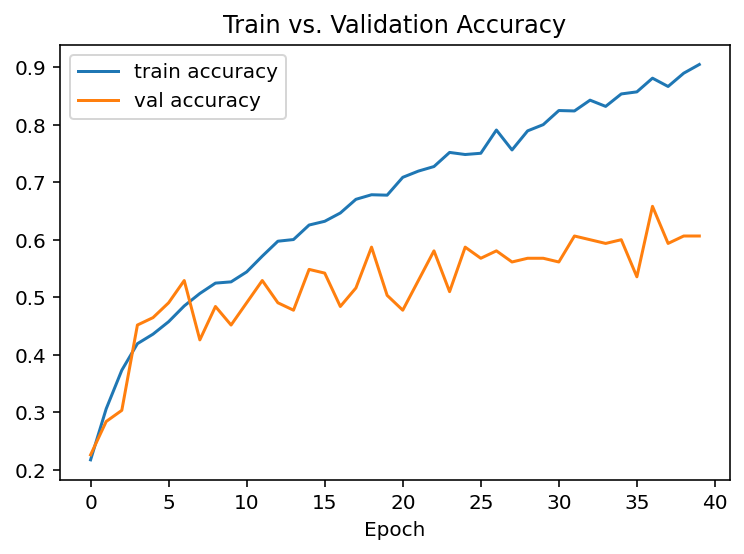

In [111]:
plt.plot(t_acc, label='train accuracy')
plt.plot(v_acc, label='val accuracy')

plt.title('Train vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

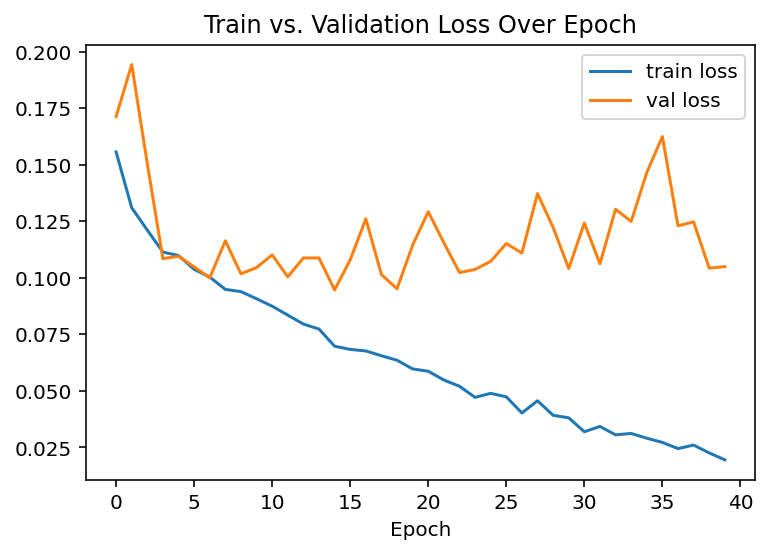

In [112]:
plt.plot(t_loss, label='train loss')
plt.plot(v_loss, label='val loss')

plt.title('Train vs. Validation Loss Over Epoch')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Testing

In [120]:
test_set = ImgDataset(x_test, test_label, transform=test_transform)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [121]:
n_class = 10
classes = names #[Name[i] for i in range(n_class)]

correct = {cl: 0 for cl in classes}
total = {cl: 0 for cl in classes}

y_true = []
y_pred = []

acc = 0.0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        print('true:\t   ',labels)
        
        outputs = model(images)
        _, prediction = torch.max(outputs, axis=1)
        print('prediction:',prediction,'\n')
        acc += (prediction == labels).sum().item()
        
        
        for y, pred in zip(labels, prediction):
            if y == pred:
                correct[classes[y]] += 1
            total[classes[y]] += 1
            
            y_true += [classes[y]]
            y_pred += [classes[pred]]
            

cnn_acc = acc / test_set.__len__()

# print(y_pred)
print(len(y_pred))

true:	    tensor([8, 4, 2, 6, 0, 1, 7, 4, 3, 8, 8, 7, 3, 3, 1], device='cuda:0')
prediction: tensor([3, 4, 1, 8, 0, 1, 7, 4, 9, 8, 8, 7, 3, 5, 8], device='cuda:0') 

true:	    tensor([0, 0, 7, 3, 0, 0, 3, 0, 2, 7, 4, 2, 4, 7, 8], device='cuda:0')
prediction: tensor([0, 0, 7, 7, 6, 0, 6, 0, 1, 5, 4, 2, 4, 7, 0], device='cuda:0') 

true:	    tensor([7, 0, 4, 3, 0, 7, 1, 7, 2, 1, 9, 2, 3, 1, 9], device='cuda:0')
prediction: tensor([7, 9, 2, 8, 0, 7, 1, 7, 3, 1, 9, 3, 3, 1, 9], device='cuda:0') 

true:	    tensor([2, 9, 9, 5, 3, 3, 5, 6, 5, 4, 0, 8, 4, 1, 1], device='cuda:0')
prediction: tensor([4, 9, 9, 5, 3, 3, 3, 3, 4, 4, 9, 3, 9, 7, 1], device='cuda:0') 

true:	    tensor([9, 3, 8, 7, 6, 5, 9, 0, 7, 8, 8, 6, 8, 1, 2], device='cuda:0')
prediction: tensor([9, 0, 0, 9, 5, 7, 9, 0, 4, 8, 8, 6, 3, 1, 4], device='cuda:0') 

true:	    tensor([0, 7, 3, 3, 7, 1, 4, 6, 3, 4, 9, 4, 1, 8, 0], device='cuda:0')
prediction: tensor([0, 7, 3, 6, 7, 4, 4, 5, 3, 4, 9, 4, 1, 8, 0], device='cuda:0') 

true

In [122]:
print('CNN has accuracy: %3.4f' % cnn_acc)

CNN has accuracy: 0.6032


In [123]:
for classname, correct_num in correct.items():
    class_acc =  correct_num / total[classname] * 100
    print('Breed %s has %3.1f'% (classname, class_acc)+'% '+ 'accuracy' )

Breed Japanese_spaniel has 77.8% accuracy
Breed Afghan_hound has 59.6% accuracy
Breed Pekinese has 17.2% accuracy
Breed Tzu has 54.8% accuracy
Breed Rhodesian_ridgeback has 79.4% accuracy
Breed Chihuahua has 26.7% accuracy
Breed toy_terrier has 55.9% accuracy
Breed Maltese_dog has 80.0% accuracy
Breed papillon has 53.8% accuracy
Breed Blenheim_spaniel has 78.4% accuracy


In [124]:
list(correct.keys())

['Japanese_spaniel',
 'Afghan_hound',
 'Pekinese',
 'Tzu',
 'Rhodesian_ridgeback',
 'Chihuahua',
 'toy_terrier',
 'Maltese_dog',
 'papillon',
 'Blenheim_spaniel']

In [125]:
conf_mat = confusion_matrix(y_true, y_pred)

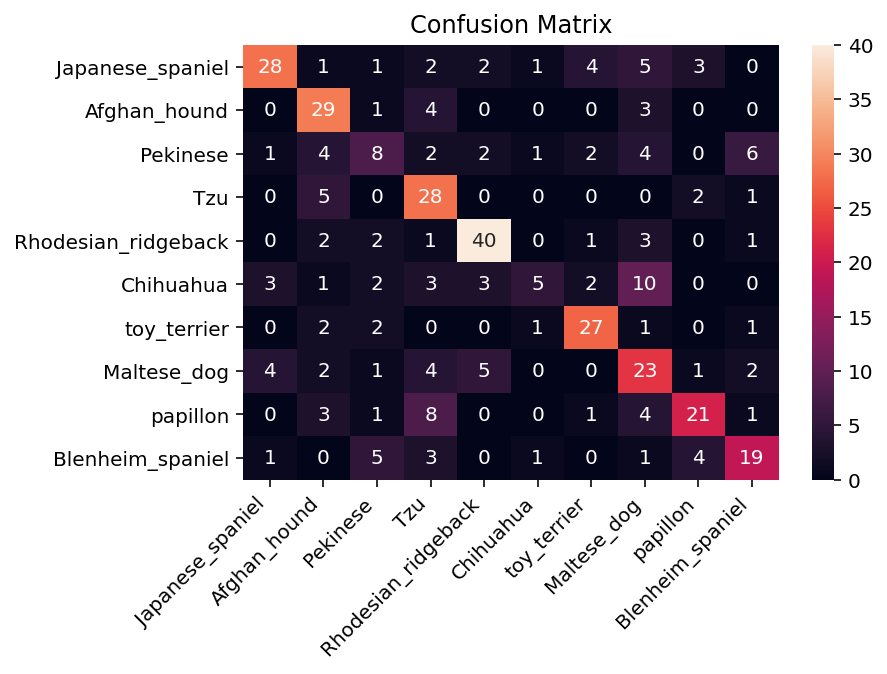

In [126]:
fig = sns.heatmap(conf_mat,annot=True,
           xticklabels=list(correct.keys()),
           yticklabels=list(correct.keys()))
fig.set_xticklabels(fig.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')
plt.title('Confusion Matrix')
plt.xlabel
plt.show()

## ResNet18

In [ ]:
from torchvision.models import resnet18

resnet18 = resnet18(pretrained=True)
print(resnet18)